In [1]:
import bikes_data

bikes = bikes_data.data_preprocessing()

bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여시간대,일자,주말구분,대여구,대여소번호,대여소명,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,8,3,평일,동대문구,646,장한평역 1번출구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,8,3,평일,성동구,526,용답토속공원 앞,37.563511,127.056725
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수,8,5,평일,동대문구,646,장한평역 1번출구,37.561966,127.064506
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0,수,8,5,평일,동대문구,646,장한평역 1번출구,37.561966,127.064506
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0,월,8,10,평일,성동구,529,장한평역 8번 출구 앞,37.561371,127.063660


# 1. 대여구별 이용건수

In [9]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '요일', '대여시간대', '일자', '주말구분', '대여구',
       '대여소번호', '대여소명', '대여점위도', '대여점경도'],
      dtype='object')

In [16]:
구별이용건수 = bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count').sort_values(by='자전거번호',ascending=True).reset_index()
구별이용건수.head()

,대여구,자전거번호
0,금천구,33650
1,도봉구,37810
2,중구,38733
3,강북구,38901
4,용산구,47993


<Axes: title={'center': '대여구별 이용건수'}>

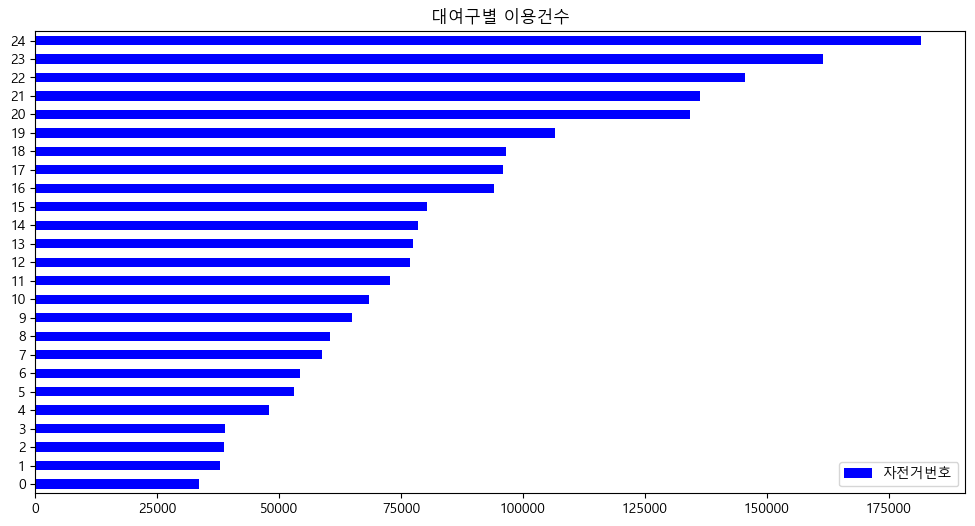

In [19]:
구별이용건수.plot(kind='barh', title='대여구별 이용건수',  figsize=(12,6), color='b')

In [17]:
import json
# 구별 위도 경도 json 파일 불러오기

with open('../../data/public_bike/Seoul_Gu.json', 'r') as f:
    seoul_data = json.load(f)

In [6]:
seoul_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.012, 37.582],
      [127.015, 37.582],
      [127.016, 37.582],
      [127.017, 37.582],
      [127.017, 37.581],
      [127.017, 37.58],
      [127.018, 37.58],
      [127.018, 37.579],
      [127.018, 37.578],
      [127.019, 37.578],
      [127.02, 37.578],
      [127.019, 37.578],
      [127.02, 37.578],
      [127.02, 37.579],
      [127.021, 37.579],
      [127.022, 37.579],
      [127.023, 37.578],
      [127.023, 37.577],
      [127.023, 37.576],
      [127.023, 37.575],
      [127.023, 37.572],
      [127.018, 37.57],
      [127.015, 37.57],
      [127.001, 37.569],
      [126.997, 37.569],
      [126.99, 37.568],
      [126.976, 37.569],
      [126.969, 37.568],
      [126.967, 37.566],
      [126.954, 37.579],
      [126.957, 37.58],
      [126.958, 37.584],
      [126.958, 37.594],
      [126.958, 37.598],
      [126.953, 37.6],
      [126.954, 37.605

In [8]:
# 키값 입력을 통해 낱개의 데이터에 접근
seoul_data['features'][0]['properties']

{'SIG_CD': '11110', 'SIG_ENG_NM': 'Jongno-gu', 'SIG_KOR_NM': '종로구'}

In [26]:
# map에 정보 추가
import folium
map = folium.Map( location=[bikes['대여점위도'].mean(), bikes['대여점경도'].mean()], zoom_start=11, width=700, height=700)
map

folium.Choropleth(
            geo_data=seoul_data, # 지역구를 표시할 지리 데이터
            data=구별이용건수, # 지도에 표시될 데이터프레임
            columns=['대여구', '자전거번호'], # 데이트 프레임에서 지역구와 이용시간 컬럼
            fill_color='YlGnBu', # 표현할 색깔 : Yellow - Green - Blue
            key_on='feature.properties.SIG_KOR_NM' # json파일에서 key값
).add_to(map)
map

# 대여구별 이용시간 평균

In [30]:
# 구별이용시간평균 피봇테이블 생성
구별이용시간평균 = bikes.pivot_table(index='대여구', values='이용시간',aggfunc='mean').reset_index().sort_values(by='이용시간',ascending=True)
구별이용시간평균

,대여구,이용시간
3,강서구,23.116492
16,성북구,23.183428
22,종로구,23.256120
2,강북구,23.351559
10,동대문구,23.886195
24,중랑구,24.112678
8,노원구,24.178508
9,도봉구,24.976752
5,광진구,25.109829
21,은평구,25.345993


In [31]:
map2 = folium.Map( location=[bikes['대여점위도'].mean(), bikes['대여점경도'].mean()], zoom_start=11, width=700, height=700)

folium.Choropleth(
            geo_data=seoul_data, # 지역구를 표시할 지리 데이터
            data=구별이용시간평균, # 지도에 표시될 데이터프레임
            columns=['대여구', '이용시간'], # 데이트 프레임에서 지역구와 이용시간 컬럼
            fill_color='YlGnBu', # 표현할 색깔 : Yellow - Green - Blue
            key_on='feature.properties.SIG_KOR_NM' # json파일에서 key값
).add_to(map2)
map2